In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
train = pd.read_csv("train.csv")

train

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,159251,40,155,45,69.0,1.5,2.0,1,1,127,...,72,159,14.5,1,0.8,25,26,13,0,0
159252,159252,50,155,75,82.0,1.0,1.0,1,1,120,...,64,108,14.5,1,0.6,21,20,18,0,0
159253,159253,40,160,50,66.0,1.5,1.0,1,1,114,...,87,93,10.9,1,0.6,15,9,12,0,0
159254,159254,50,165,75,92.0,1.2,1.0,1,1,121,...,55,80,14.4,1,1.1,22,17,37,0,1


In [4]:
train.isnull().sum()

id                     0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

In [5]:
train["smoking"].mean()

0.4373649972371528

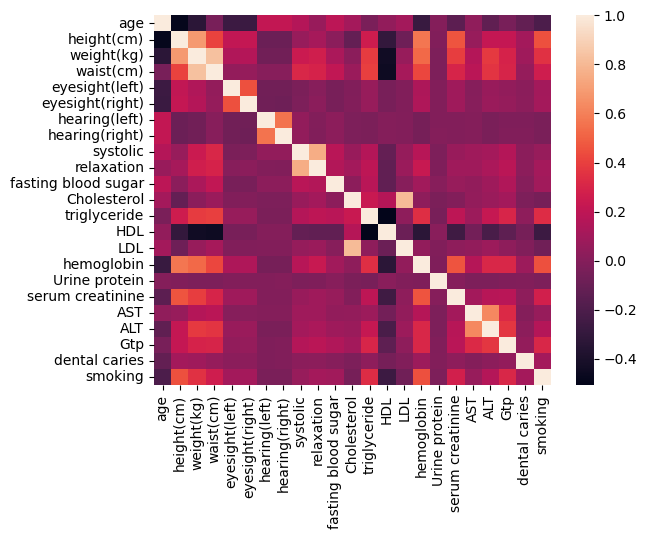

smoking                1.000000
hemoglobin             0.450679
height(cm)             0.447111
weight(kg)             0.351748
triglyceride           0.331975
Gtp                    0.305561
serum creatinine       0.272979
HDL                    0.271186
waist(cm)              0.262715
age                    0.206033
ALT                    0.163016
eyesight(right)        0.109781
relaxation             0.109501
dental caries          0.106636
eyesight(left)         0.100420
fasting blood sugar    0.096534
LDL                    0.072285
AST                    0.059394
systolic               0.058642
Cholesterol            0.051896
hearing(left)          0.038219
hearing(right)         0.036858
Urine protein          0.028548
Name: smoking, dtype: float64

In [6]:
sns.heatmap(train.drop(["id"], axis=1).corr());
plt.show()

corr = train.drop("id",axis=1).corr()
corr["smoking"].abs().sort_values(ascending=False)

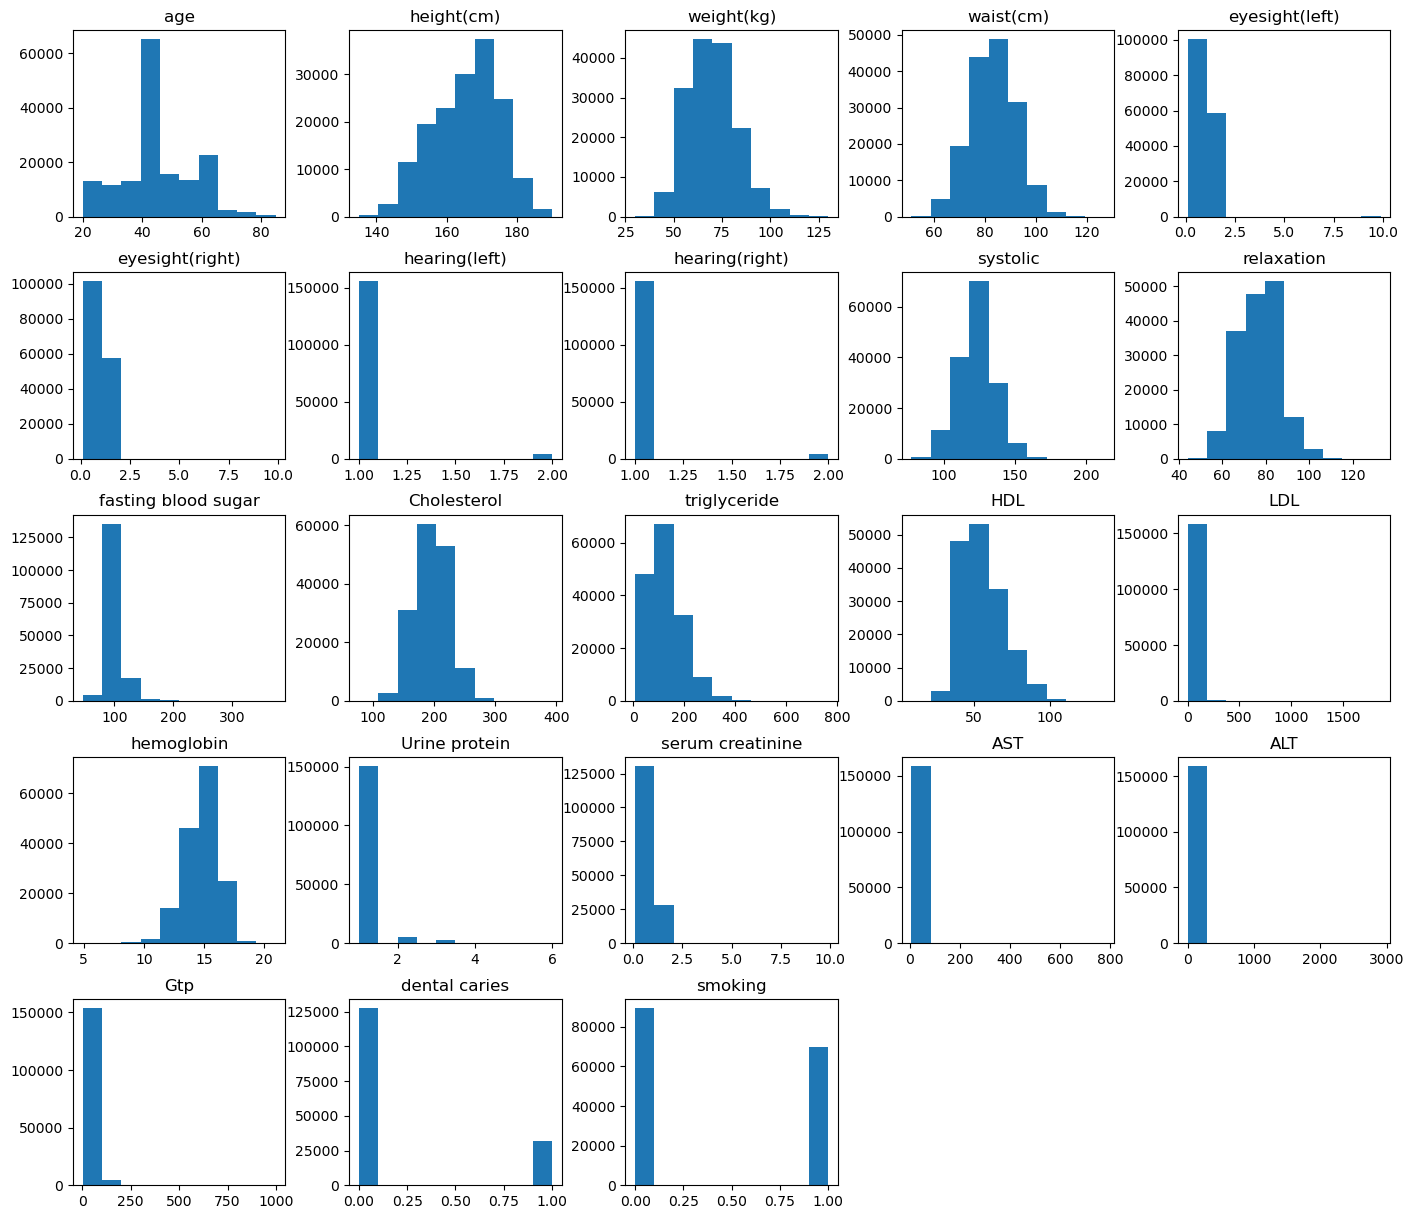

In [7]:
train.drop("id" , axis=1).hist(figsize = (17,15), grid = False);
plt.show()

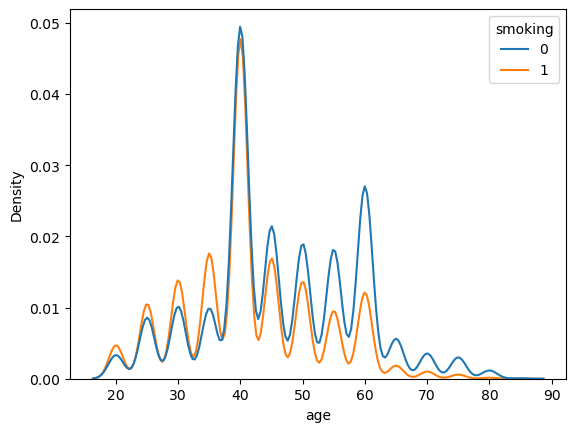

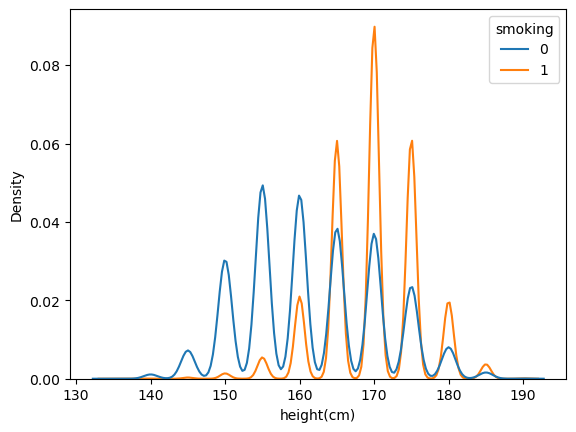

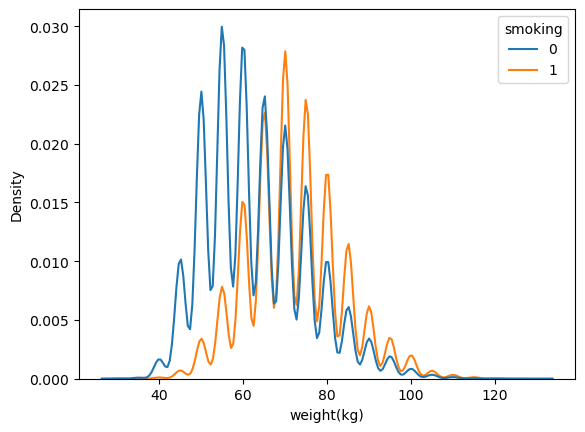

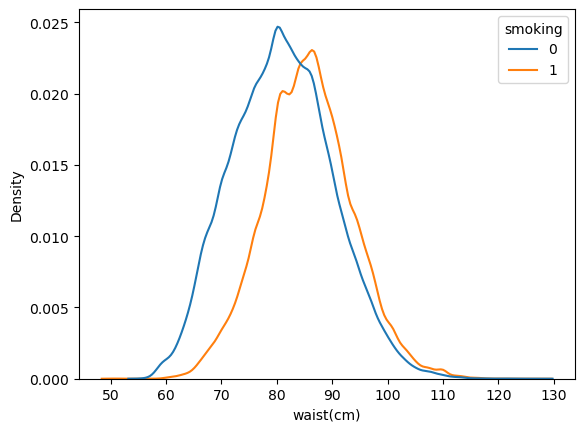

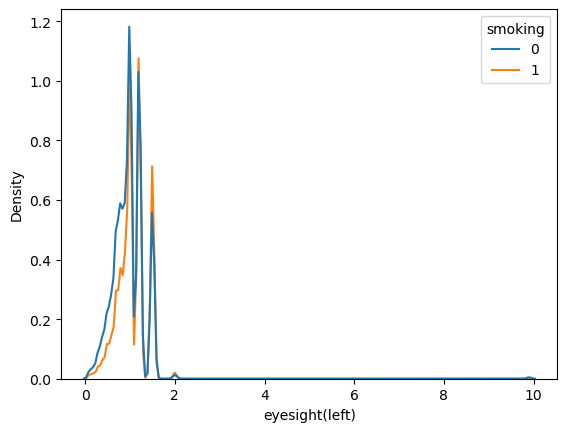

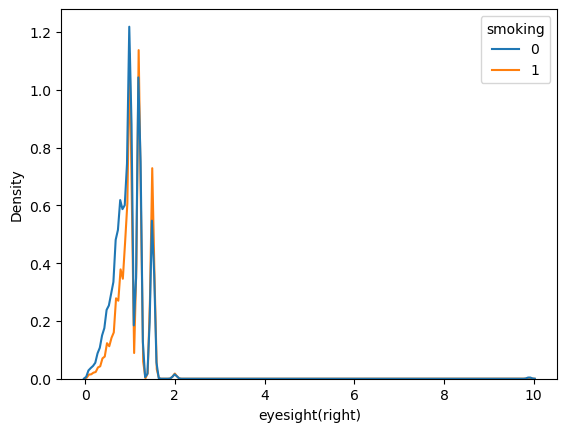

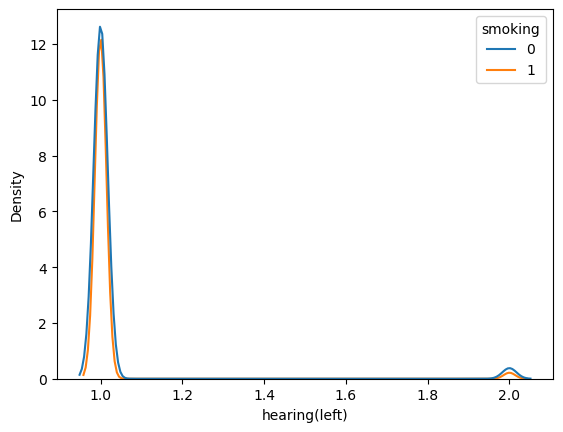

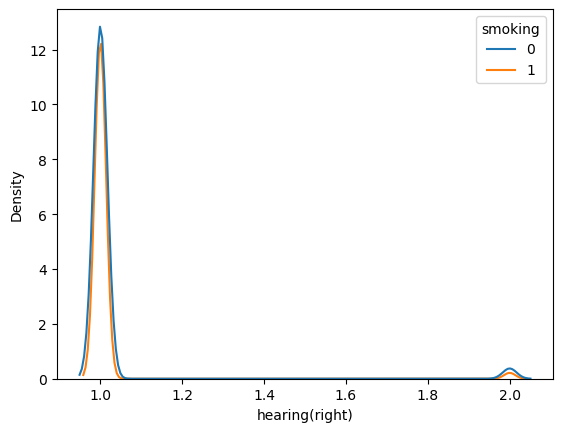

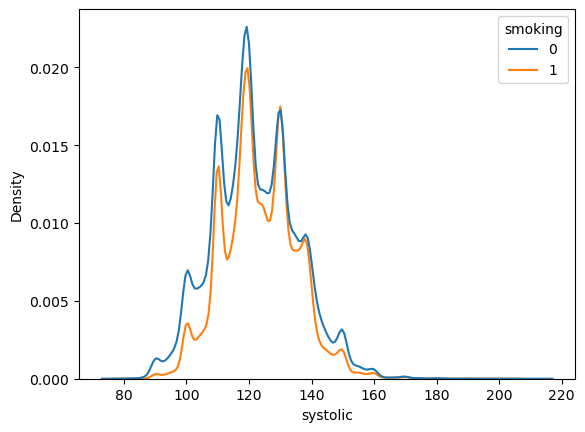

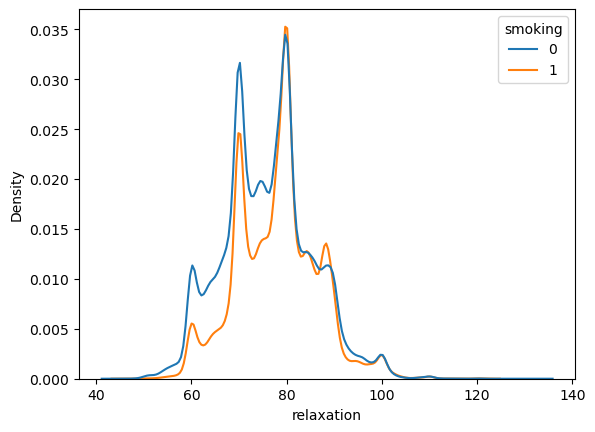

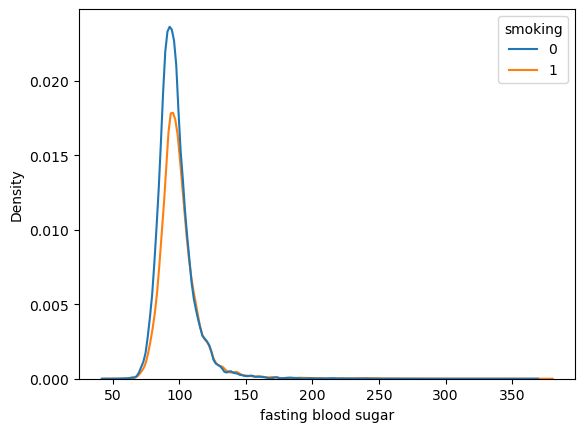

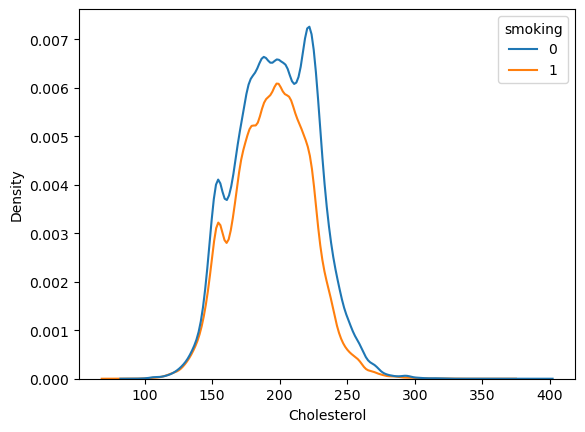

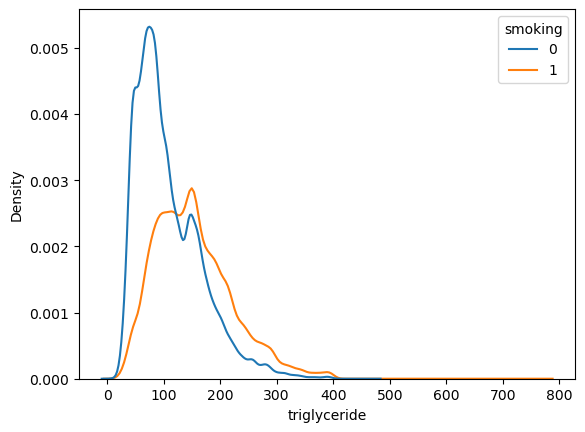

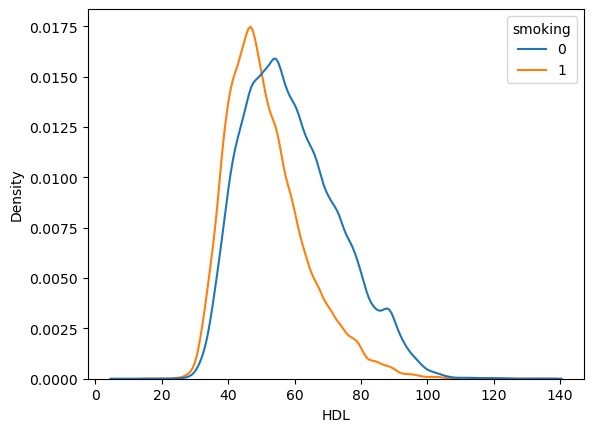

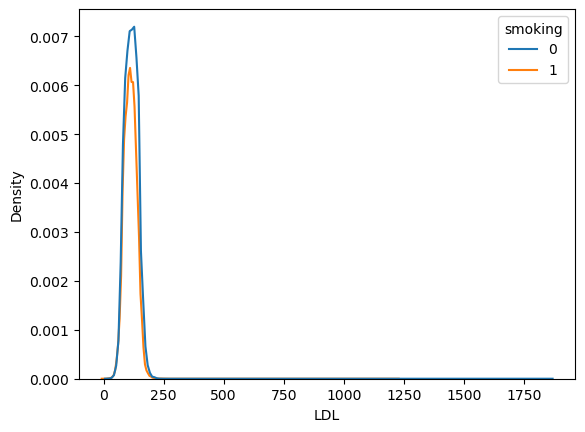

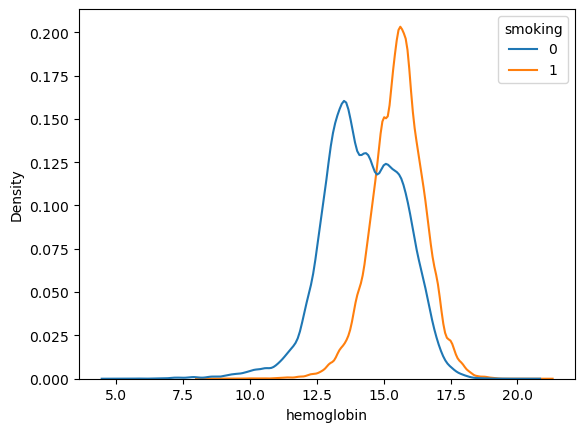

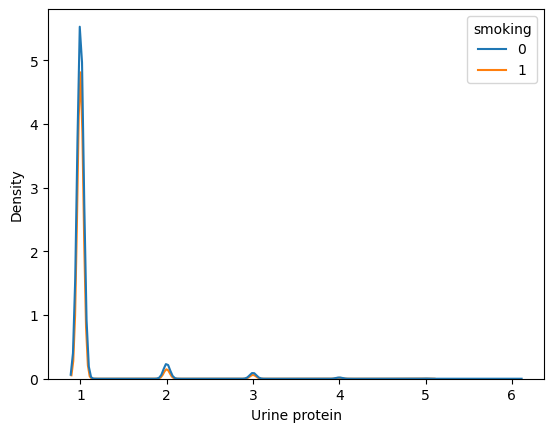

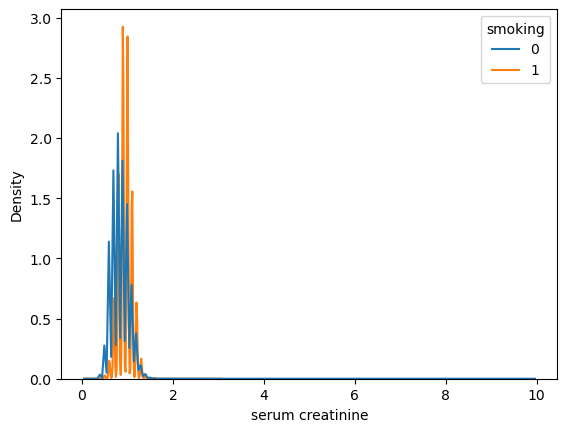

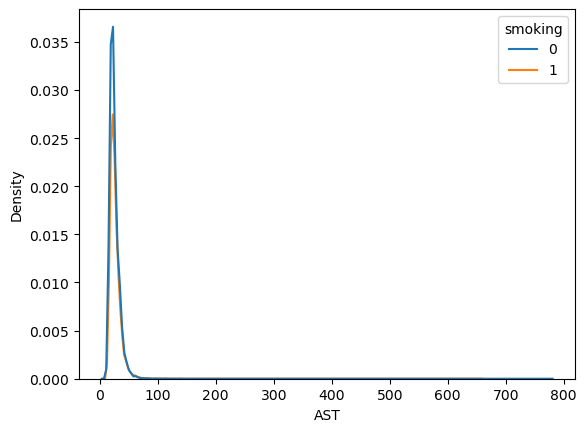

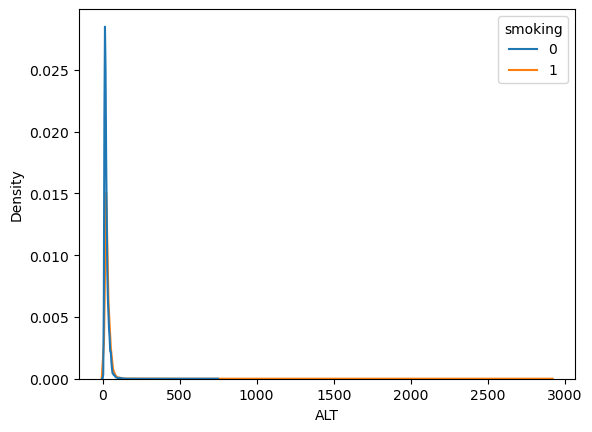

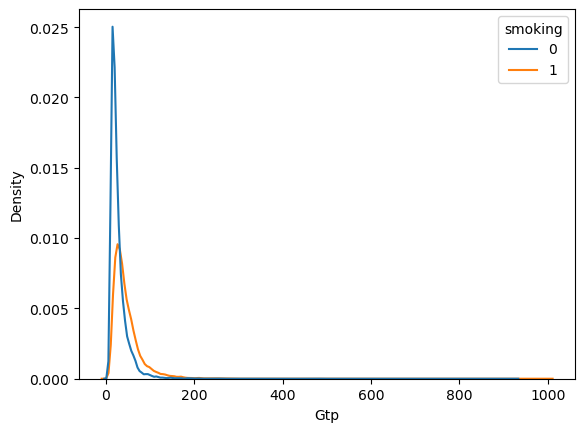

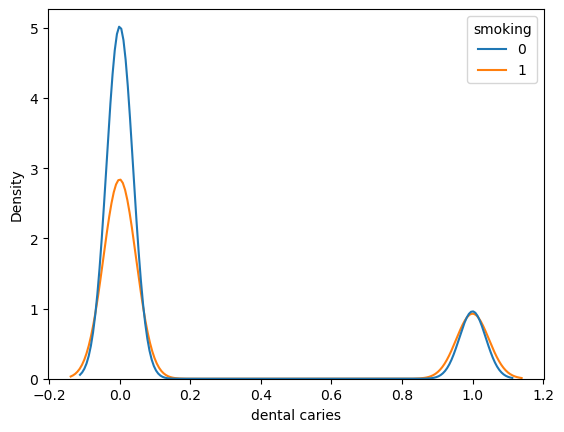

In [8]:
train_cols = [col for col in train if not col in ['id', 'smoking']]

for col in train_cols:
    sns.kdeplot(data=train, x=col, hue="smoking");
    plt.show()

In [9]:
(X_train, X_val, y_train, y_val) = train_test_split(train.drop(["id","smoking"], axis = 1), train["smoking"], test_size = 0.25, random_state = 0)

StandardScaler = StandardScaler()  

X_train = StandardScaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train)

X_val = StandardScaler.fit_transform(X_val)
X_val = pd.DataFrame(X_val)

print(train["smoking"].mean(), y_train.mean(), y_val.mean())

0.4373649972371528 0.43609450612012524 0.4411764705882353


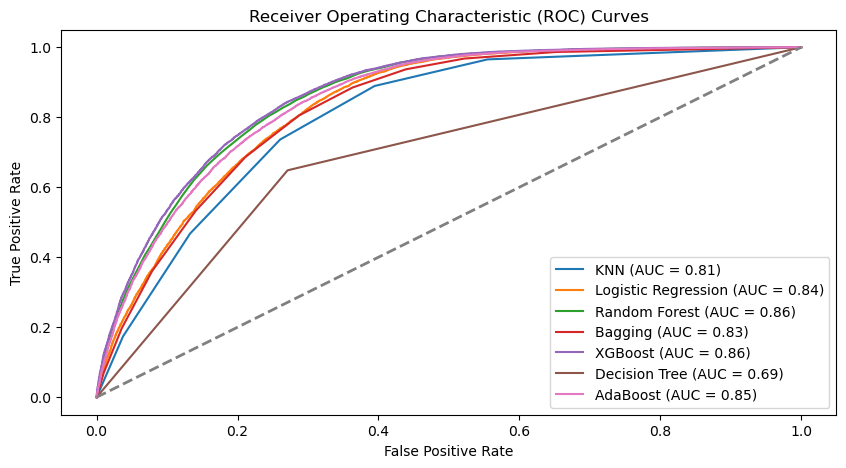

In [10]:
models = {
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Bagging": BaggingClassifier(),
    "XGBoost": XGBClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "AdaBoost": AdaBoostClassifier()
}

plt.figure(figsize=(10, 5))
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_val)[:, 1]
    fpr, tpr, _ = roc_curve(y_val, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray", linewidth=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curves")
plt.legend(loc="lower right")
plt.show()

In [19]:
test = pd.read_csv("test.csv")

ids = test["id"]

test.drop("id", axis=1, inplace=True)

test = StandardScaler.fit_transform(test)

X_train = train.drop(["id","smoking"], axis = 1)
X_train = StandardScaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train)

models = [
    ("KNN", KNeighborsClassifier()),
    ("SGD", SGDClassifier(loss = "log_loss")),
    ("Logistic Regression", LogisticRegression()),
    ("Random Forest", RandomForestClassifier()),
    ("Bagging", BaggingClassifier()),
    ("XGBoost", XGBClassifier()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("AdaBoost", AdaBoostClassifier())
]

voting_clf = VotingClassifier(estimators=models, voting="soft", verbose = True)

voting_clf.fit(X_train, train["smoking"])

y_pred = voting_clf.predict_proba(test)[:, 1]

submission = pd.DataFrame({
    "id" : ids,
    "smoking" : y_pred})

[Voting] ...................... (1 of 8) Processing KNN, total=   0.0s
[Voting] ...................... (2 of 8) Processing SGD, total=   0.6s
[Voting] ...... (3 of 8) Processing Logistic Regression, total=   0.4s
[Voting] ............ (4 of 8) Processing Random Forest, total=  31.1s
[Voting] .................. (5 of 8) Processing Bagging, total=  13.5s
[Voting] .................. (6 of 8) Processing XGBoost, total=   3.1s
[Voting] ............ (7 of 8) Processing Decision Tree, total=   1.8s
[Voting] ................. (8 of 8) Processing AdaBoost, total=   6.5s


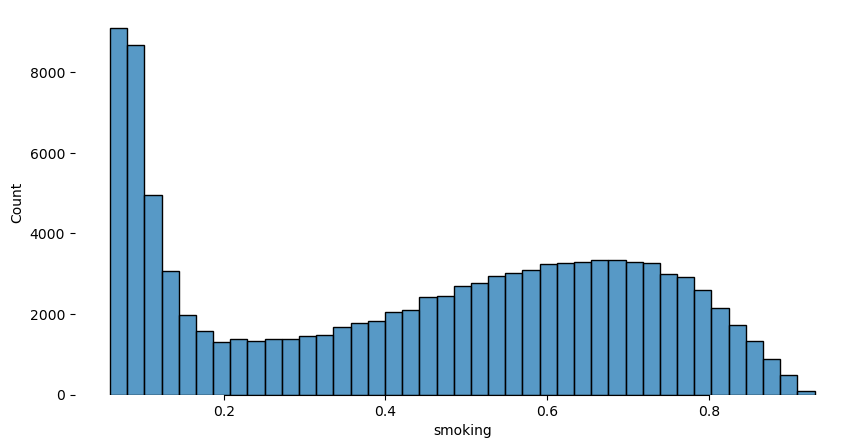

In [20]:
sns.set_style()
sns.set_color_codes()
f, ax = plt.subplots(figsize=(10, 5))
sns.histplot(submission["smoking"])
ax.xaxis.grid(False)

sns.despine(trim=True, left=True)
plt.show()

In [21]:
submission.to_csv('submission.csv', index=False)